In [2]:
import cv2
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
from skimage.transform import rotate
import numpy as np
import time as t
from scipy import misc
from skimage import io
import matplotlib.image as mpimg
from math import sqrt, log, pi 
from skimage.filters import threshold_minimum


%matplotlib inline

## Partie V : Prétraitements simples : inversion, seuillage, transformation de contraste

#### Negation d'une image NDG

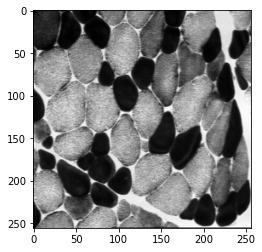

In [3]:
#Cahargement et affichage de l'image "musc.bmp"
mon_ndg=plt.imread('musc.bmp')
plt.imshow(mon_ndg,cmap="gray")
plt.show()

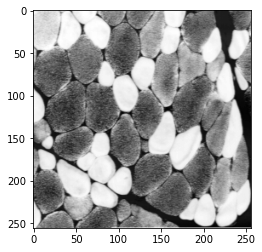

In [4]:
#Récupération des dimnsion de l'image
dim=mon_ndg.shape

##Negation de l'image mon_ndg
## parcours de chaque pixel de l'image, récupérationde sa valeur
## substitution de chaque valeur par 225-la_valeur
for i in range(dim[0]):
    for j in range(dim[1]):
        v=mon_ndg[i,j]
        mon_ndg[i,j]=255-v

##Affichage des résultats
plt.imshow(mon_ndg,cmap="gray")
plt.show()

Comme indiqué dans la figure en haut, la négation de l'image nous a pertmet d'inverser les couleurs de l'image, ainsi le blanc devient noir et le noir devient blanc.

#### Negation d'une image en couleur

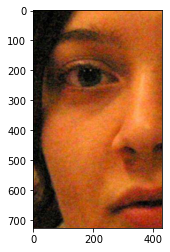

In [5]:
##Chargement et affichage de l'image photocoul
mon_coul=plt.imread('photocoul.jpg')
plt.imshow(mon_coul,cmap="gray")
plt.show()

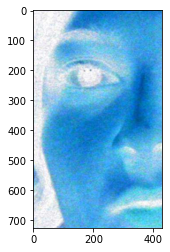

In [6]:
##Récupération des dimension de l'image
dim=mon_coul.shape

##une image couleur stocke 3 canaux différents. Donc, si nous avons besoin d'une transformation négative d'une image,
##nous devons inverser ces 3 canaux.

##parcours de chaque pixel de l'image
##récupération des valeurs r,v,b (rouge,vertn bleu)
##substitution de chaque valeur par 225-la_valeur
for i in range(dim[0]):
    for j in range(dim[1]):
        r,v,b=mon_coul[i,j]
        r,v,b=255-r,255-v,255-b
        mon_coul[i,j]=(r,v,b)

##Résultats
plt.imshow(mon_coul,cmap="gray")
plt.show()

la figure en haut illustre, la négation de notre image en couleur, et comme nous pouvons le remarquer, les couleurs foncées de l'image se transforme en blanc et autres les couleurs de l'image tendent plus vers le bleu,

#### Programmation du seuillage avec otsu

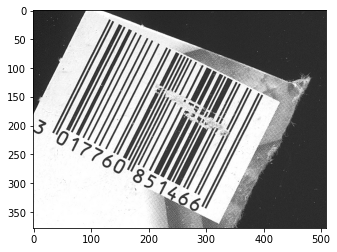

In [7]:
##Chargement et affichage de l'image originale
mon_img_seuil=plt.imread('codebarre.png')
plt.imshow(mon_img_seuil)
plt.show()

In [29]:
def otsu_th(img,nbins=255):    
    bins = [np.count_nonzero(img==i)for i in range(256)]
    dim=img.size
    seuil=256
    sm=None
    sgm=[]
    
    ##seuillage otsu
    for i in range(256):
        ##class1 => pixel qui on une valeur < seuil
        ##class2 ==> pixels ayant une valeur > seuil
        class1 = img[np.where(img<=i)]
        class2 = img[np.where(img>i)]
        # calcule de la fréquence de pixels de la classe1, et celle de la classe2 
        O = (len(class1)/dim,len(class2)/dim)
        #insertion de la valeur 0 dans la liste de la classe vide
        if class1.size == 0 :
            class1 = [0]
        if class2.size == 0 :
            class2 = [0]
        var_ = (np.var(class1),np.var(class2))
        #calcul de sigma
        sg = O[1]*var_[1]+O[0]*var_[0]
        sgm.append(sg)
        if sm is None or sg < sm :
            sm = sg
            seuil = i
        
    return seuil, sgm

seuil :: 0


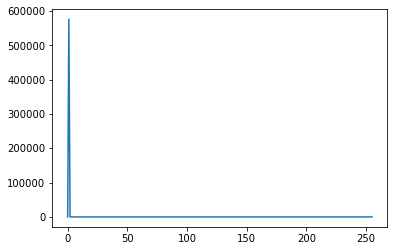

In [30]:
seuil,sigma = otsu_th(mon_img_seuil)
print("seuil ::", seuil)
bar_binaire = mon_img_seuil > seuil
bar_binaire_number = bar_binaire.astype(int)

bar_binaire_histogram,bins = np.histogram(bar_binaire_number.ravel(),256,[0,255])
plt.plot(bar_binaire_histogram)
plt.show()

# print(type(bar_binaire_number))
# print("bar binaire :: ",bar_binaire_number)
# plt.imshow(bar_binaire_number)

#### Binarisation de l'image 

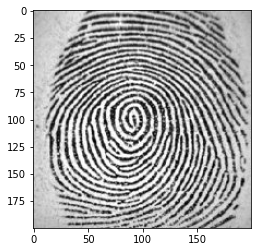

In [12]:
##Chargement de l'image
image_bin = plt.imread('empr.jpg')
plt.imshow(image_bin,cmap='gray')

In [ ]:
#La fonction de binarisation commence par recuperer les dimensions de l'image en parametres,
#puis elle crée une matrice de zeros ayant les mêmes dimensions récuperées
#puis elle cherche les pixel dont les valeurs sont dans le seuil en parametres
#Et elle remplace l'equivalent de ces pixel dans la matrice de zéros par des 1
def binarisation(image,seuil):
    mon_img = plt.imread(image)
    l,c=mon_img.shape  
    image_b=np.zeros((l,c))
    image_b[mon_img<=seuil]=1
    plt.imshow(image_b, cmap='binary')
    plt.show()
    return image_b

In [ ]:
image_binarisee = binarisation('empr.jpg',127.5)

Ici, j'ai binarisé l'empreunte c'est à dire que l'image ne contient que soit des 1 soit des 0 selon un seuil définit : 127.5. du coup les bords de l'image sont plus intenses.

In [ ]:
#Ce code nous permet de compter le nombre de pixel ayant une valeur de 0 dans une image
#pour récuperer ce nombre  on initialise un compteur, et on fait le parcours sur les pixels de l'image 
#on verifie si la valeur du picel est égale à zéro, si c'est le cas on incrémente la valeur du compteur
d=image_bin.shape
count=0
for i in range(d[0]):
    for j in range(d[1]):
        if(image_bin[i,j]==0):
            count=count+1 
print(count)

In [ ]:
##Histogramme de l'image 
myhist2,bins = np.histogram(image_bin.ravel(),256,[0,255])
plt.plot(myhist2)
plt.show()

In [ ]:
di=image_bin.shape
last=image_bin[0,0]
print(last)
a=np.zeros(di)
for i in range(1,di[0]):
    for j in range(0,di[1]):
        last=np.cumsum(image_bin[i,j])
        myhist2,bins = np.histogram(a.ravel(),256,[0,255])
plt.plot(myhist2)
plt.show()

## Partie VI : Restauration d'image

In [ ]:
from scipy import signal
import scipy.ndimage
from tqdm import *
from PIL import Image, ImageDraw
%matplotlib inline

- Les filtres

In [ ]:
#filtre gaussien selon une valeur de sigma en utilisat gaussian_filter de scipy
def filtregauss(img, sigma):
    image_resultante = cv2.imread(img)
    i = scipy.ndimage.filters.gaussian_filter(image_resultante,sigma)
    plt.imshow(i, cmap="gray")
    
#filtre Médian sur une image selon une valeur de sigma, en utilisant median_filter de scipy
def filtremedian(img, sigma):
    image_res = cv2.imread(img)
    i = scipy.ndimage.filters.median_filter(image_res,sigma)
    plt.imshow(i, cmap="gray")

###### pour notre image de l'arbre poivre sel

Le filtre médian est très efficace pour enlever un bruit poivre et sel contrairement au filtre gaussien ui lui se contente surtout de lisser l'image, c'est le cas avec nos images dead tree salt and pepper, echo et uro_irm aux quelles nous appliquons nos filtre avc des sigma différents. 

- ici la gaussienne lisse

In [ ]:
filtregauss("Dead_tree_salt_and_pepper.png",2)

- ici le médian enlève le bruit poivre sel

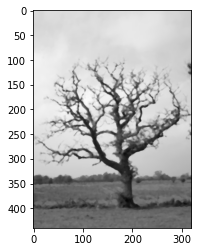

In [369]:
filtremedian("Dead_tree_salt_and_pepper.png",4)

Pour le cas de cette image c'est le filtre médian qu'est le plus efficace, puisque on ne cherche pas à lisser l'image

###### pour l'image uro_irm

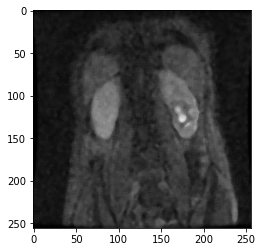

In [373]:
filtremedian("uro_irm.jpg",5)

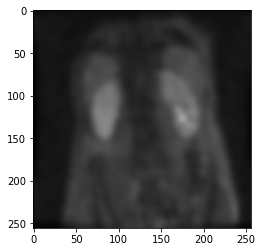

In [371]:
filtregauss("uro_irm.jpg",4)

Encore une fois le filtre gaussien n'est pas aapté à ce cas, puisque on cherche à rendre l'image plus claire et non pas d'effectuer un lissage sur elle.
En peut remarquer que le fitre médian a aidé à augmenter la qualité de l'image en enlevant le bruit.

###### pour l'image echo

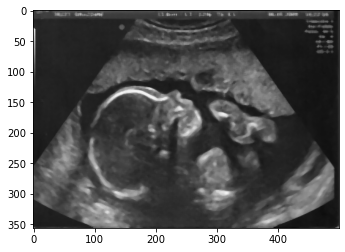

In [375]:
filtremedian("echo.jpg",5)

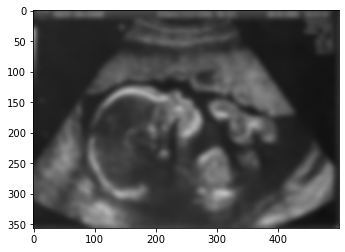

In [377]:
filtregauss("echo.jpg",4)

Dans le cas de cette image, le fitre Médian a été plus adapté, puisque on ne cherche pas à faire un lissage, et l'enlevement de bruit "salt and paper" a aidé à augmenter la qualité de l'image 

## Partie VIII : Détection de contours

* Les noyaux

In [45]:
def intensity(img):
    image_entree = Image.open(img)
    pixel_entree = image_entree.load()
    dim = np.shape(image_entree)
    resultat = [[(sum(pixel_entree[int(x),int(y)])/3) for y in range(dim[1])]for x in range(dim[0])]
    return resultat

def noyaugauss(dimension, dimension_y=None):
    dimension = int(dimension)
    if not dimension_y:
        dimension_y=dimension
    else:
        dimension_y=int(dimension_y)
    x,y=np.mgrid[-dimension:dimension+1,-dimension_y:dimension_y+1]
    gauss=np.exp(-(x**2/float(dimension)+y**2/float(dimension_y)))
    return gauss, gauss.sum()

def noyausobel(imgsrc):
    image_entree = Image.open(imgsrc)
    pixel_entree = image_entree.load()
    #noyau_sobel
    noyaux = [[-1,0,1],[-2,0,2],[-1,0,1]]
    noyauy = [[-1,-2,-1],[0,0,0],[1,2,1]]
    #creation de l'image de sortie
    image_sortie = Image.new("RGB",image_entree.size)
    draw = ImageDraw.Draw(image_sortie)
    intensite = intensity(imgsrc)
    #Application du masque 3x3 à l'image_entree
    for x in range(1, image_entree.width - 1):
        for y in range(1,image_entree.height - 1):
            magx, magy = 0,0
            for a in range(3):
                for b in range(3):
                    xn=x+a-1
                    yn=y+b-1
                    magx += intensite[xn][yn]*noyaux[a][b]
                    magy += intensite[xn][yn]*noyauy[a][b]
    #
            print("magx {} magy{}".format(magx,magy))
            color = int(sqrt(magx**2+magy**2))
            draw.point((x,y),(color, color, color))
    image_sortie.save("sobelXdog.jpg")
    return image_sortie

##### Sobel

In [46]:
noyausobel("Dead_tree_salt_and_pepper.png")

TypeError: 'int' object is not iterable

In [49]:
##Detection de contours
def DoG(image):
    img = cv2.imread(image)
    #application d'un filtre gaussian 5x5
    blur5 = cv2.GaussianBlur(img,(5,5),80)
    #application d'un filtre gaussian 5x5
    blur3 = cv2.GaussianBlur(img,(3,3),80)
    #soustraction des résultats de filtre Gaussian
    DoGim=blur5-blur3
    
    #création de élément structurant à l'aide de getStructuringElement
    elkernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,13))
    #application de transformations morphologiques sur les résulats du filtres gaussians, on utilisan le kerne de structuration
    gradient1 = cv2.morphologyEx(blur5,cv2.MORPH_GRADIENT,elkernel)
    gradient2 = cv2.morphologyEx(blur3,cv2.MORPH_GRADIENT,elkernel)
    
    ##Calcul de la valeur de DoG 
    DoGim1 =-(gradient1-gradient2)
    #img2 = np.copy(DoGim1)
    #filtregauss(img2,100)
    plt.imshow(DoGim1, cmap="gray")
    return DoGim1

<function __main__.DoG()>

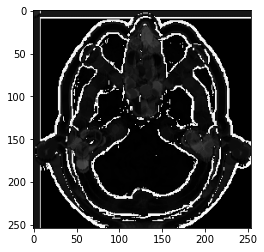

In [48]:
image = DoG("scanner_tete.bmp")
DoG

Comme illustré dans la figure, les bords de l'image sont beaucoup plus clairs, en les comparant avec ceux de l'image originale

es :: [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


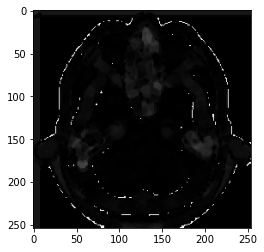

In [55]:
es = np.ones((3,3))
print("es ::",es)
th1 = cv2.erode(image, es)
plt.imshow(th1)

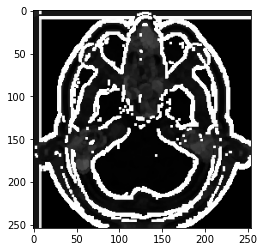

In [56]:
th2 = cv2.dilate(image, es)
plt.imshow(th2)

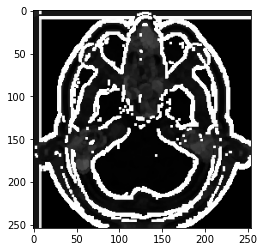

In [315]:
i=cv2.morphologyEx(th2, cv2.MORPH_OPEN, es)
plt.imshow(i)

## Partie IX : A vous de jouer !

##### Detection de contour :

In [83]:
def contouring(img1_p,img2_p,t1,t2):
    img1 = cv2.imread(img1_p)
    img2 = cv2.imread(img2_p)
    #Pour chaque pixel, la même valeur de seuil est appliquée. 
    #Si la valeur du pixel est inférieure au seuil, elle est définie sur 0, 
    #sinon elle est définie sur une valeur maximale
    
    #ici on applique le thresholding (methode décrite dans le commentaire ci-dessus) aux deux images en parametes
   
    ret1, th1 = cv2.threshold(img1,t1,255,cv2.THRESH_BINARY)
    ret2, th2 = cv2.threshold(img2,t2,255,cv2.THRESH_BINARY)
    es = np.ones((3,3),dtype=np.int)
    
    #applciation de l'érosion :tous les pixels proches de la limite seront supprimés en fonction de la taille du noyau (es=3X3). 
    #Ainsi, l'épaisseur ou la taille de l'objet de premier plan diminue ou simplement la région blanche diminue dans l'image.
    th1 = cv2.erode(th1,es)
    #delate c'est l'opposé de erode
    th1 = cv2.dilate(th1,es)
    th1 = cv2.dilate(th1,es)
    
    #On appplique pour les deux thresholds la fonction erode suivi de dilate
    #l'érosion est suivie d'une dilatation. Car, l'érosion supprime les bruits blancs, mais elle rétrécit aussi notre objet. 
    #Alors on le dilate
    th2 = cv2.erode(th2, es)
    th2 = cv2.dilate(th2,es)
    th2 = cv2.dilate(th2,es)
    
    #Affichage des Résultats
    plt.subplot(1,2,1)
    plt.title("Contours détéctés à l'aide du T1")
    plt.imshow(th1, cmap="gray")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('T2')
    plt.imshow(th2,cmap='gray')
    plt.axis('off')
    plt.show()
    image = th1[:,:].astype('uint8')
    contours, _ = cv2.findContours(image.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img_ = cv2.drawContours(img1,contours,-1,[255,0,0],1)
    surface = 0.64*img_ #0.8 * 0.8 = 0.64
    print("la surface est de : "+str(surface))
    plt.title("superposition des contours détéctés sur l'image")
    plt.imshow(img_,cmap='gray')

In [79]:
#contouring("echo.jpg","lena1.jpg",127,127)

#### 1° SCANNER DE TETE

In [80]:
#!pip install opencv-python

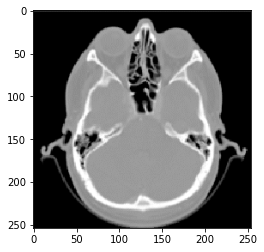

In [81]:
img1 = plt.imread("scanner_tete.bmp")
img2 = np.copy(img1)
plt.imshow(img1, cmap="gray")

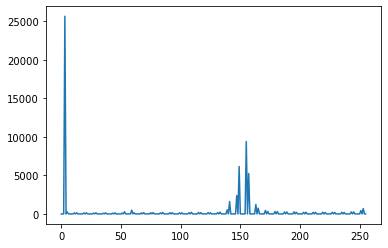

In [82]:
myhist2,bins = np.histogram(img1.ravel(),256,[0,255])
plt.plot(myhist2)
plt.show()

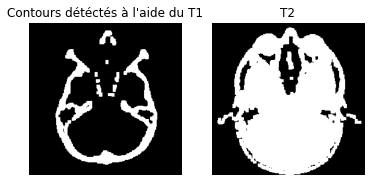

la surface est de : [[[115.84 115.84 115.84]
  [ 37.76  37.76  37.76]
  [ 37.76  37.76  37.76]
  ...
  [ 37.76  37.76  37.76]
  [ 37.76  37.76  37.76]
  [ 37.76  37.76  37.76]]

 [[119.68 119.68 119.68]
  [ 33.92  33.92  33.92]
  [ 37.76  37.76  37.76]
  ...
  [ 33.92  33.92  33.92]
  [ 37.76  37.76  37.76]
  [ 33.92  33.92  33.92]]

 [[104.32 104.32 104.32]
  [  1.92   1.92   1.92]
  [  1.92   1.92   1.92]
  ...
  [  1.92   1.92   1.92]
  [  1.92   1.92   1.92]
  [  1.92   1.92   1.92]]

 ...

 [[105.6  105.6  105.6 ]
  [  1.92   1.92   1.92]
  [  1.92   1.92   1.92]
  ...
  [  1.92   1.92   1.92]
  [  1.92   1.92   1.92]
  [  1.92   1.92   1.92]]

 [[104.32 104.32 104.32]
  [  1.92   1.92   1.92]
  [  1.92   1.92   1.92]
  ...
  [  1.92   1.92   1.92]
  [  1.92   1.92   1.92]
  [  1.92   1.92   1.92]]

 [[105.6  105.6  105.6 ]
  [  1.92   1.92   1.92]
  [  1.92   1.92   1.92]
  ...
  [  1.92   1.92   1.92]
  [  1.92   1.92   1.92]
  [  1.92   1.92   1.92]]]


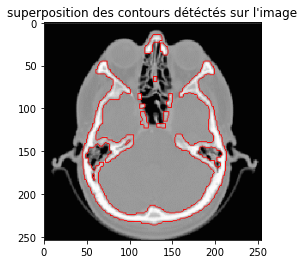

In [331]:
contouring(img1,img2,170,145)

#### 2° CODES-BARRES

In [88]:
def contouring2(img1,img2,t1,t2):
    
    #ici on applique le thresholding aux deux images en parametes
    ret1, th1 = cv2.threshold(img1,t1,255,cv2.THRESH_BINARY) 
    ret2, th2 = cv2.threshold(img2,t2,255,cv2.THRESH_BINARY)
    es = np.ones((3,3))
    
    #applciation de l'érosion :tous les pixels proches de la limite seront supprimés en fonction de la taille du noyau (es=3X3). 
    #Ainsi, l'épaisseur ou la taille de l'objet de premier plan diminue ou simplement la région blanche diminue dans l'image.
    th1 = cv2.erode(th1,es)
    #delate c'est l'opposé de eode
    th1 = cv2.dilate(th1,es)
    th1 = cv2.dilate(th1,es)
    
    #On appplique pour les deux thresholds la fonction erode suivi de dilate
    #l'érosion est suivie d'une dilatation. Car, l'érosion supprime les bruits blancs, mais elle rétrécit aussi notre objet. 
    #Alors on le dilate
    th2 = cv2.erode(th2, es)
    th2 = cv2.dilate(th2,es)
    th2 = cv2.dilate(th2,es)
    
    #Affichage des résultats
    plt.subplot(1,2,1)
    plt.title("Contours détéctés à l'aide du T1")
    plt.imshow(th1, cmap="gray")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('T2')
    plt.imshow(th2,cmap='gray')
    plt.axis('off')
    plt.show()
    image = th1[:,:].astype('uint8')
    contours, _ = cv2.findContours(image.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    img1 = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)  #add this line
    img_ = cv2.drawContours(img1,contours,-1,[0,0,0],1)
    plt.title("superposition des contours détéctés sur l'image")
    plt.imshow(img_,cmap='gray')

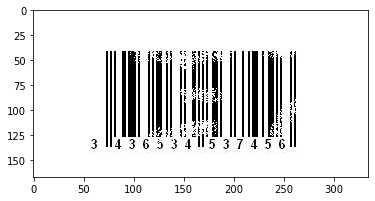

In [89]:
#Chargement et affichage de l'image de test
mon_img_cb1=plt.imread('codebarre.bmp')
mon_img_cb2=np.copy(mon_img_cb1)
plt.imshow(mon_img_cb1, cmap="gray")
plt.show()

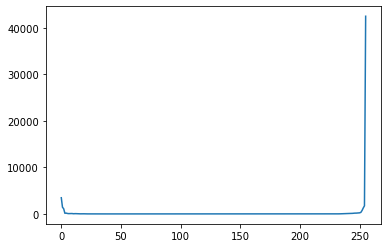

In [90]:
#Histogram de l'image de test ava,t l'application de la fonction de detection de contours
myhist4,bins = np.histogram(mon_img_cb1.ravel(),256,[0,255])
plt.plot(myhist4)
plt.show()

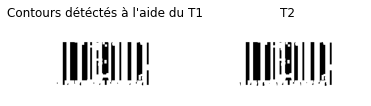

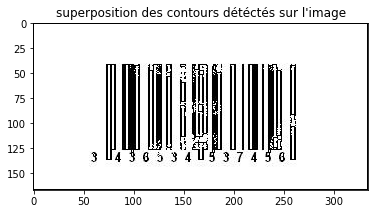

In [91]:
contouring2(mon_img_cb1,mon_img_cb2,150,230)

On peut remarquer dans l'image ci-dessus que les bords de l'image sont plus visible que ceux de l'image originale, ce qui signife que notre fonction de detection de conteurs donne des résultats

#### 3°PHOTOCOUL

image d'origine

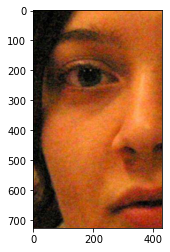

In [95]:
imgOrigine = plt.imread("photocoul.jpg")
plt.imshow(imgOrigine, cmap="gray")
plt.show()

restaurer l'image photocoul.jpg, qui est une photo prise sans flash possédant du bruit :
application d'un filtre médian et de sigma = 8 pour enlever le bruit et retrouver l'image original sans flash.

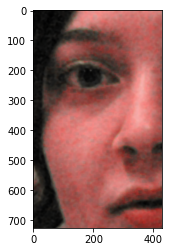

In [96]:
filtremedian("photocoul.jpg",8)

## Partie X :  Implémentation de l'algorithme de clustering pour la segmentation d'images 


In [98]:
def clustering(image):
    #ouverture de l'image
    img = Image.open(image)
    dim = np.shape(img)
    #choix des représentant des deux régions chromosomes et fonds
    ndg_chromo=217
    ndg_fond=32
    #
    chromor=[]
    fond=[]
    #
    #calcule pour chaque pixel en terme d'intensité à chacun des représentatns :
    for i in range(dim[0]):
        for j in range(dim[1]):
            np.abs()